In [46]:
#These are libraries that you should import if needed for your notebook.
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Chance


At the most basic level, probability seeks to answer the question, “What is the chance of an event happening?”

An event is some outcome of interest.

To calculate the chance of an event happening, we also need to consider all the other events that can occur.


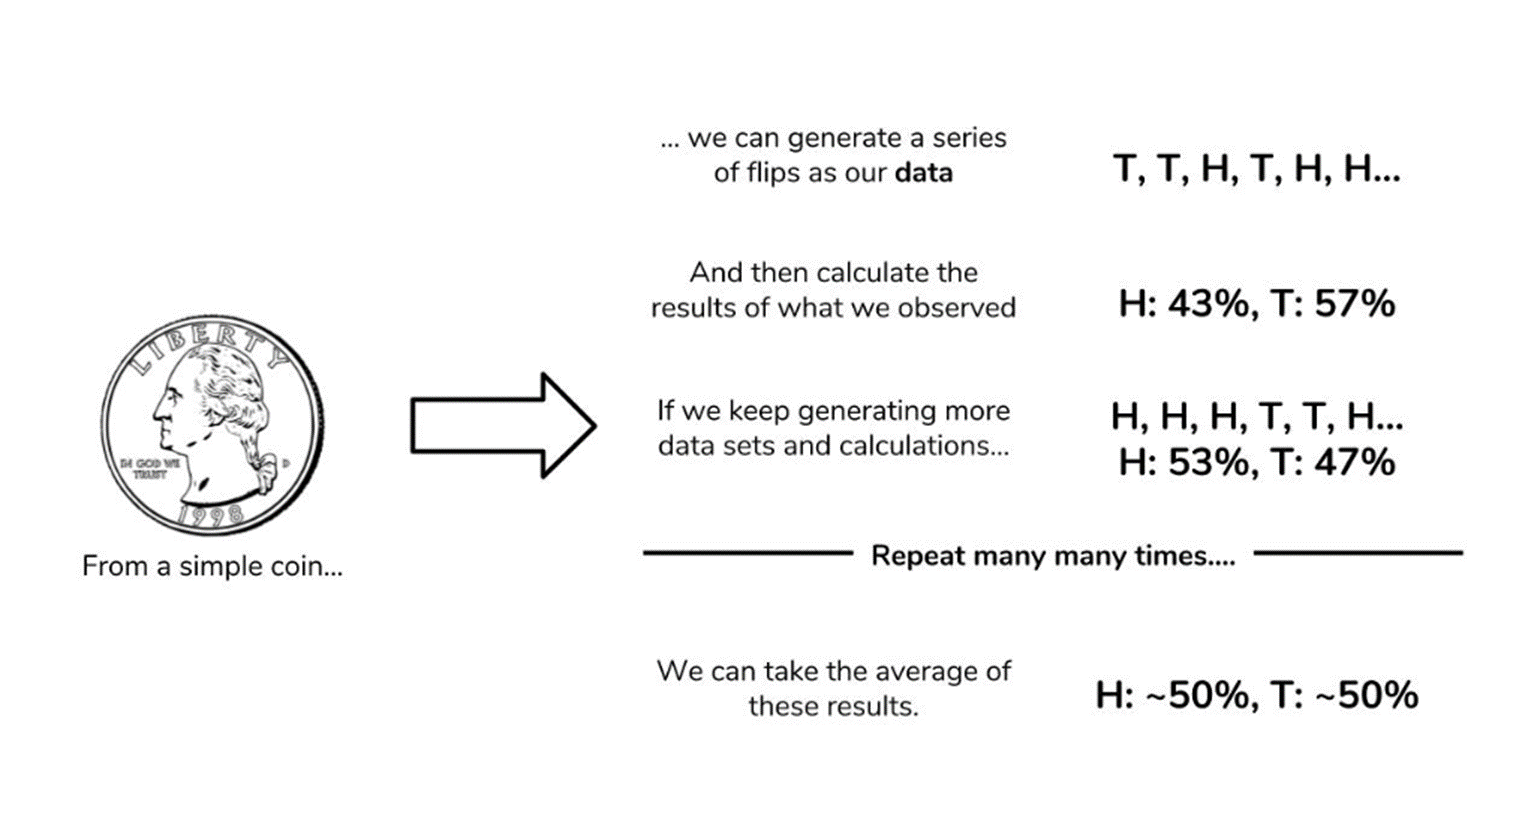

## Law of Averages / Law of Large Numbers

If a chance experiment is repeated many times, independently and under the same conditions, then the proportion of times that an event occurs gets closer to the theoretical probability of the event.


## Multiplication rule

Chance that two events A and B both happen

= P(A happens) x P(B happens)

The answer is less than or equal to each of the two chances being multiplied

The more conditions you have to satisfy, the less likely you are to satisfy them all

## Addition rule

If event A can happen in exactly one of two ways, then

P(A) = P(first way) + P(second way)

The answer is greater than or equal to the chance of each individual way

## Random

Suppose you have three cards each with a unique colour - Red, Green and Blue.
I shuffle the cards and ask you to draw one card.
What is the chance the card will be Red?

In [47]:
cards = np.array(['R','G','B'])
cards

array(['R', 'G', 'B'], dtype='<U1')

In [48]:
np.random.choice(cards)

'G'

In [49]:
np.random.choice(cards)

'B'

In [50]:
game = np.random.choice(cards,1)
game

array(['B'], dtype='<U1')

In [51]:
game = np.random.choice(cards,10)
game

array(['B', 'B', 'B', 'B', 'G', 'B', 'B', 'G', 'R', 'G'], dtype='<U1')

In [52]:
array_of_reds = (game =='R')
array_of_reds

array([False, False, False, False, False, False, False, False,  True,
       False])

In [53]:
sum(array_of_reds)/len(array_of_reds)

0.1

In [54]:
game = np.random.choice(cards,10)
sum(game=='R')/len(game)

0.4

In [55]:
game = np.random.choice(cards,100)
sum(game=='R')/100

0.34

In [56]:
sum(np.random.choice(cards,100)=='R')/100

0.37

In [57]:
sum(np.random.choice(cards,1000)=='R')/1000

0.323

In [58]:
sum(np.random.choice(cards,10000)=='R')/10000

0.3343

In [59]:
# simulate 10000 games
ten_thousand_tries = np.array([])

for i in np.arange(10000):
  ten_thousand_tries = np.append(ten_thousand_tries, np.random.choice(cards))

sum(ten_thousand_tries=='R')/10000



0.3335

**Class Exercise:** Suppose you have three cards each with a unique colour - Red, Green and Blue.
I shuffle the cards and ask you to draw two cards without replacement.
What is the chance or probability the cards will be Red followed by Blue?

Hint: Make use of iteration and conditional statements

In [60]:
cards = np.array(['R','G','B'])
first = np.random.choice(cards)
first

'B'

In [61]:
second = np.random.choice(['R','B'])

In [62]:
'R'+'G'

'RG'

In [63]:
results = np.array([])

for i in np.arange(10000):
  first_card = np.random.choice(np.array(['R','G','B']))
  if first_card == 'R':
    second_card = np.random.choice(np.array(['B','G']))
  elif first_card == 'G':
    second_card = np.random.choice(np.array(['R','B']))
  else:
    second_card = np.random.choice(np.array(['R','G']))

  game = first_card + second_card

  results = np.append(results,game)

sum(results=='RB')/10000

0.1631

In [64]:
1/6

0.16666666666666666

**Another version**

In [65]:
results = np.array([])
cards = np.array(['R','G','B'])


for i in np.arange(10000):
  first = np.random.choice(cards)

  if first == 'R':
    second = np.random.choice(['G','B'])
  elif first == 'G':
    second = np.random.choice(['R','B'])
  elif first == 'B':
    second = np.random.choice(['G','R'])

  choice = first + second
  results = np.append(results, choice)

sum(results == 'RB')/10000


0.1752

In [66]:
1/6

0.16666666666666666

# TAKE-HOME EXERCISE

The Monty Hall problem is a famous probability puzzle based on a game show scenario. In this problem, a contestant is presented with three doors: behind one door is a car (the prize), and behind the other two doors are goats. The contestant picks one door, and then the host, Monty Hall, who knows what's behind each door, opens one of the remaining two doors to reveal a goat. The contestant is then given the choice to either stick with their original choice or switch to the other unopened door. To determine the best strategy—whether to stick or switch—simulate this game by running multiple trials and calculating the win rates for both strategies.

# Monty Hall Problem

In [67]:
goats =np.array(['first goat', 'second goat'])

In [68]:
def other_goat(x):
    if x == 'first goat':
        return 'second goat'
    elif x == 'second goat':
        return 'first goat'

In [69]:
[other_goat('first goat'), other_goat('second goat')]

['second goat', 'first goat']

In [70]:
hidden_behind_doors = np.append(goats, 'car')
hidden_behind_doors

array(['first goat', 'second goat', 'car'], dtype='<U11')

In [71]:
def monty_hall_game():
    """Return
    [contestant's guess, what Monty reveals, what remains behind the other door]"""

    contestant_guess = np.random.choice(hidden_behind_doors)

    if contestant_guess == 'first goat':
        return [contestant_guess, 'second goat', 'car']

    if contestant_guess == 'second goat':
        return [contestant_guess, 'first goat', 'car']

    if contestant_guess == 'car':
        revealed = np.random.choice(goats)
        return [contestant_guess, revealed, other_goat(revealed)]

In [72]:
monty_hall_game()

['car', 'second goat', 'first goat']

In [73]:
games = pd.DataFrame(columns=['Guess', 'Revealed', 'Remaining'])

for i in np.arange(10000):
    new_row = pd.DataFrame([monty_hall_game()],
                           columns=['Guess', 'Revealed', 'Remaining'])
    games = pd.concat([games, new_row], ignore_index=True)


In [74]:
games.head(3)

,Guess,Revealed,Remaining
0,second goat,first goat,car
1,first goat,second goat,car
2,first goat,second goat,car


In [75]:
original_choice = games.groupby('Guess').count().drop(['Remaining'], axis=1)
original_choice = original_choice.rename(columns={'Revealed': 'Original Door'})

original_choice

,Original Door
Guess,
car,3285
first goat,3329
second goat,3386


In [76]:
#remaining_door = games.group('Remaining')
remaining_door = games.groupby('Remaining').count().drop(['Revealed'], axis=1)
remaining_door = remaining_door.rename(columns={'Guess': 'Remaining Door'})
remaining_door

,Remaining Door
Remaining,
car,6715
first goat,1631
second goat,1654


In [77]:
joined = pd.concat([original_choice, remaining_door], axis=1)
joined

,Original Door,Remaining Door
car,3285,6715
first goat,3329,1631
second goat,3386,1654


<Axes: >

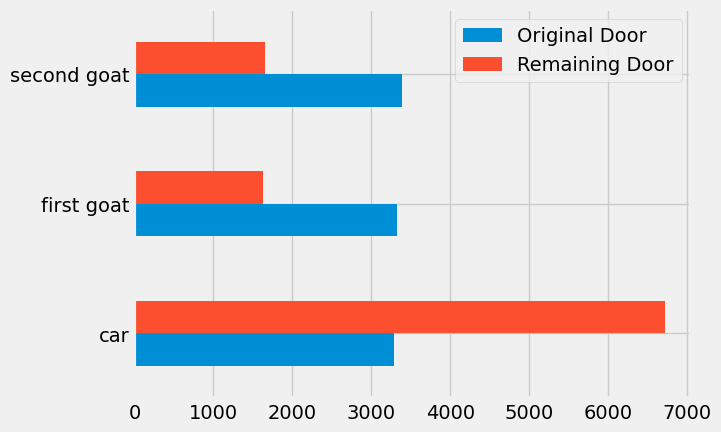

In [78]:
joined.plot(kind='barh')

# Sampling

The population is the set of all observations (individuals, objects, events, or procedures) and is usually very large and diverse.

Whereas a sample is a subset of observations from the population that ideally is a true representation of the population.

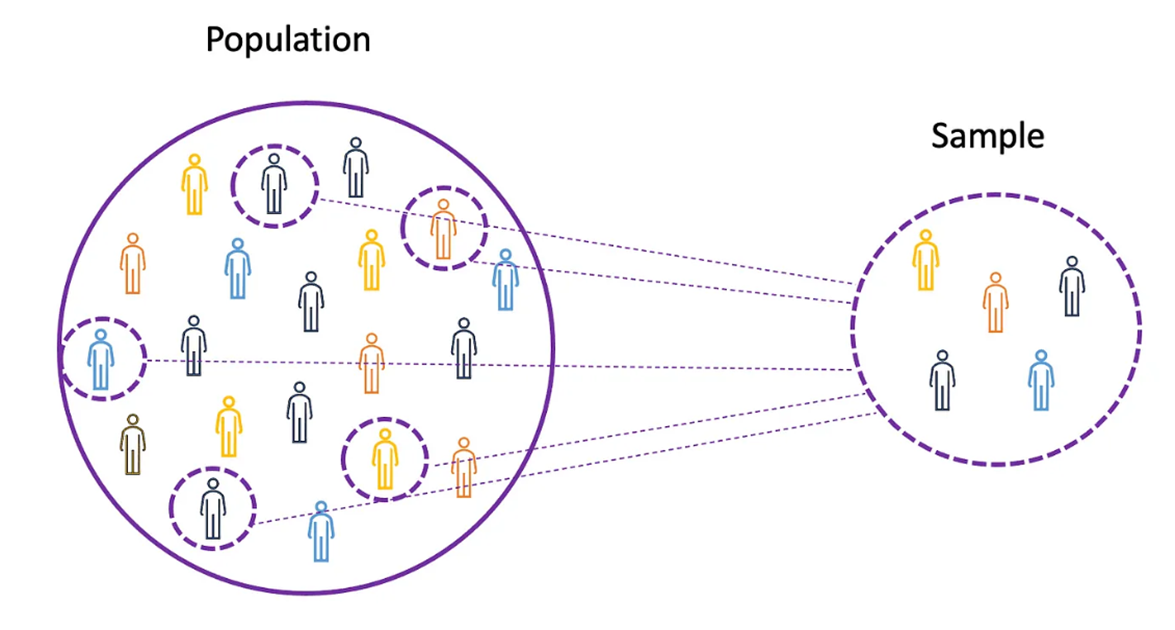

## Random Sampling


A **simple random sample** is a randomly selected subset of a population.

This method is the most straightforward of all the probability sampling methods.

Before the sample is drawn, you have to know the selection probability of every group of people in the population.

Not all individuals / groups have to have equal chance of being selected.

## **Working with an array**

In [79]:
# create and array with options
chicken_brood = np.array(['hen','rooster','hen','hen','hen','rooster','rooster','rooster'])

In [80]:
# make a single random pick from the array
np.random.choice(chicken_brood)

'rooster'

In [81]:
# make two random picks from the array
np.random.choice(chicken_brood,2)

array(['hen', 'hen'], dtype='<U7')

## **Working with a table**

In [82]:
# make a table
cb = pd.DataFrame({'gender' : chicken_brood})
cb

,gender
0,hen
1,rooster
2,hen
3,hen
4,hen
5,rooster
6,rooster
7,rooster


In [83]:
# make a single random pick from the table
cb.sample(1)

,gender
7,rooster


In [85]:
# make two random picks from the table
cb.sample(2)

,gender
6,rooster
0,hen


In [87]:
# extend the table
num_rows = len(cb)
num_rows

8

In [88]:
cb['row_num'] = np.arange(1,num_rows+1)
cb['index_num'] = np.arange(num_rows)
cb

,gender,row_num,index_num
0,hen,1,0
1,rooster,2,1
2,hen,3,2
3,hen,4,3
4,hen,5,4
5,rooster,6,5
6,rooster,7,6
7,rooster,8,7


In [92]:
# without replacement
sample_without_replacement = cb.sample(8)
sample_without_replacement

,gender,row_num,index_num
6,rooster,7,6
2,hen,3,2
3,hen,4,3
1,rooster,2,1
5,rooster,6,5
0,hen,1,0
7,rooster,8,7
4,hen,5,4


In [93]:
# with replacement
sample_with_replacement = cb.sample(8, replace=True)
sample_with_replacement

,gender,row_num,index_num
2,hen,3,2
3,hen,4,3
7,rooster,8,7
4,hen,5,4
6,rooster,7,6
2,hen,3,2
0,hen,1,0
3,hen,4,3


## **Non-random sampling from tables**

In [94]:
# display table
cb

,gender,row_num,index_num
0,hen,1,0
1,rooster,2,1
2,hen,3,2
3,hen,4,3
4,hen,5,4
5,rooster,6,5
6,rooster,7,6
7,rooster,8,7


In [95]:
# sample the first row
cb.iloc[0]

,0
gender,hen
row_num,1
index_num,0


In [96]:
# sample the third row
cb.iloc[2]

,2
gender,hen
row_num,3
index_num,2


In [97]:
cb.iloc[0:3]

,gender,row_num,index_num
0,hen,1,0
1,rooster,2,1
2,hen,3,2
